### BANCO DE ESPAÑA
#### Tipos de interés

In [1]:
%load_ext autoreload
%autoreload 2
import os
import re
import sys
import locale
from datetime import date, datetime
from pathlib import Path

import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import pandas as pd
import requests

cwd = Path.cwd()
home = Path.home()
module_path = f"{home}/serhi/src/lib" if cwd == home else f"{cwd.parents[1]}/lib"
sys.path.append(module_path)
import serhi

SerHi Tools


In [2]:
# inicio
# cambiar como corresponda

ENTITY = "bde"
NB_NAME = "bde_tipos_interes"
serhi.initialize(ENTITY, NB_NAME)

serhi.CWD /home/runner/work/serhi/serhi/src/entidades/bde
serhi.HOME /home/runner
serhi.BASE_PATH /home/runner/work/serhi/serhi
serhi.DATA_PATH /home/runner/work/serhi/serhi/data/process/bde/
serhi.DOWN_PATH /home/runner/work/serhi/serhi/tmp/download/bde/
serhi.OUT_FILE /home/runner/work/serhi/serhi/data/process/bde/bde_tipos_interes.csv


https://www.bde.es/webbde/es/estadis/infoest/series/be1901.xlsx

In [3]:
urls = [
    {
    'url':'https://www.bde.es/webbde/es/estadis/infoest/series/be1901.xlsx',
    'file':'be_tipos_interes.xlsx'
    },    
]

serhi.download_files(urls)

In [4]:
def diff_month(d1, d2):
    return (d1.year - d2.year) * 12 + d1.month - d2.month
    
locale.setlocale(locale.LC_TIME, 'es_ES.UTF-8')

'es_ES.UTF-8'

In [5]:
# claculate number of rows to read
nrows = diff_month(datetime.today(),date(1973,1,1))
df = pd.read_excel(serhi.DOWN_PATH + urls[0]['file'],skiprows=3,nrows=nrows+2)
df.head()

# remove two first rows
df = df[2:]

# show
df

,DESCRIPCIÓN DE LA SERIE,MERCADO MONETARIO. TIPOS DE INTERES MERCADO INTERBANCARIO. EURIBOR. A UNA SEMANA.,MERCADO MONETARIO. TIPOS DE INTERES MERCADO INTERBANCARIO. EURIBOR. A UN MES.,MERCADO MONETARIO. TIPOS DE INTERES MERCADO INTERBANCARIO. EURIBOR. A TRES MES.,MERCADO MONETARIO. TIPOS DE INTERES MERCADO INTERBANCARIO. EURIBOR. A SEIS MES.,Tipo de interés. UEM. Mercado monetario. Euríbor. A 12 meses,Tipo de interés. UEM. Mercado monetario. ESTR,Tipo de interés. UEM. Mercado monetario. ESTR.1,Tipo de interés. UEM. Mercado monetario. ESTR.2,Tipo de interés. UEM. Mercado monetario. ESTR.3,...,Tipo de interés. De referencia. Oficiales. Mercado hipotecario. interest Rate Swap a 5 años.1,Tipo de interés. De referencia. Préstamos hipotecarios para calcular el valor de mercado. IRS. A siete años,Tipo de interés. De referencia. Préstamos hipotecarios para calcular el valor de mercado. IRS. A diez años,Tipo de interés. De referencia. Préstamos hipotecarios para calcular el valor de mercado. IRS. A quince años,Tipo de interés. De referencia. Préstamos hipotecarios para calcular el valor de mercado. IRS. A veinte años,Tipo de interés. De referencia. Préstamos hipotecarios para calcular el valor de mercado. IRS. A treinta años,Tipo de interés. De referencia. Mercado hipotecario. Interbancario.Fecha BOE,Tipo de interés. De referencia. Mercado hipotecario. Tipo medio préstamos hipotecarios.Fecha BOE,Tipo de interés. De referencia. Mercado hipotecario. Deuda Pública de 2 a 6 años.Fecha BOE,Tipo de interés. De referencia. Mercado hipotecario. Fecha BOE IRS
2,ENE 1973,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
3,FEB 1973,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
4,MAR 1973,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
5,ABR 1973,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
6,MAY 1973,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,AGO 2022,-0.071,0.022,0.395,0.837,1.249,-0.081,-0.085,-0.393,-0.487,...,1.721,1.813,1.947,2.069,1.977,1.738,2022-Sep-02,2022-Sep-20,2022-Sep-03,2022-Sep-08
598,SEP 2022,0.424,0.574,1.011,1.596,2.233,0.662,0.3,-0.101,-0.342,...,2.598,2.62,2.682,2.702,2.532,2.169,2022-Oct-04,2022-Oct-20,2022-Oct-05,2022-Oct-11
599,OCT 2022,0.696,0.915,1.428,1.997,2.629,0.656,0.655,0.286,-0.136,...,3.02,3.065,3.137,3.15,2.942,2.506,2022-Nov-03,2022-Nov-18,2022-Nov-03,2022-Nov-10
600,NOV 2022,1.375,1.423,1.825,2.321,2.828,1.404,1.29,0.764,0.182,...,2.809,2.802,2.844,2.865,2.696,2.316,2022-Dic-02,2022-Dic-20,2022-Dic-03,2022-Dic-03


In [6]:
# set date column
df.rename(columns={'DESCRIPCIÓN DE LA SERIE':'Date'},inplace=True)
# convert to dates
df['Date'] = pd.to_datetime(df['Date'])

In [7]:
df.tail()

,Date,MERCADO MONETARIO. TIPOS DE INTERES MERCADO INTERBANCARIO. EURIBOR. A UNA SEMANA.,MERCADO MONETARIO. TIPOS DE INTERES MERCADO INTERBANCARIO. EURIBOR. A UN MES.,MERCADO MONETARIO. TIPOS DE INTERES MERCADO INTERBANCARIO. EURIBOR. A TRES MES.,MERCADO MONETARIO. TIPOS DE INTERES MERCADO INTERBANCARIO. EURIBOR. A SEIS MES.,Tipo de interés. UEM. Mercado monetario. Euríbor. A 12 meses,Tipo de interés. UEM. Mercado monetario. ESTR,Tipo de interés. UEM. Mercado monetario. ESTR.1,Tipo de interés. UEM. Mercado monetario. ESTR.2,Tipo de interés. UEM. Mercado monetario. ESTR.3,...,Tipo de interés. De referencia. Oficiales. Mercado hipotecario. interest Rate Swap a 5 años.1,Tipo de interés. De referencia. Préstamos hipotecarios para calcular el valor de mercado. IRS. A siete años,Tipo de interés. De referencia. Préstamos hipotecarios para calcular el valor de mercado. IRS. A diez años,Tipo de interés. De referencia. Préstamos hipotecarios para calcular el valor de mercado. IRS. A quince años,Tipo de interés. De referencia. Préstamos hipotecarios para calcular el valor de mercado. IRS. A veinte años,Tipo de interés. De referencia. Préstamos hipotecarios para calcular el valor de mercado. IRS. A treinta años,Tipo de interés. De referencia. Mercado hipotecario. Interbancario.Fecha BOE,Tipo de interés. De referencia. Mercado hipotecario. Tipo medio préstamos hipotecarios.Fecha BOE,Tipo de interés. De referencia. Mercado hipotecario. Deuda Pública de 2 a 6 años.Fecha BOE,Tipo de interés. De referencia. Mercado hipotecario. Fecha BOE IRS
597,2022-08-01,-0.071,0.022,0.395,0.837,1.249,-0.081,-0.085,-0.393,-0.487,...,1.721,1.813,1.947,2.069,1.977,1.738,2022-Sep-02,2022-Sep-20,2022-Sep-03,2022-Sep-08
598,2022-09-01,0.424,0.574,1.011,1.596,2.233,0.662,0.3,-0.101,-0.342,...,2.598,2.62,2.682,2.702,2.532,2.169,2022-Oct-04,2022-Oct-20,2022-Oct-05,2022-Oct-11
599,2022-10-01,0.696,0.915,1.428,1.997,2.629,0.656,0.655,0.286,-0.136,...,3.02,3.065,3.137,3.15,2.942,2.506,2022-Nov-03,2022-Nov-18,2022-Nov-03,2022-Nov-10
600,2022-11-01,1.375,1.423,1.825,2.321,2.828,1.404,1.29,0.764,0.182,...,2.809,2.802,2.844,2.865,2.696,2.316,2022-Dic-02,2022-Dic-20,2022-Dic-03,2022-Dic-03
601,2022-12-01,1.595,1.724,2.063,2.56,3.018,1.907,1.553,1.182,0.537,...,2.836,2.788,2.787,2.737,2.532,2.131,2023-Ene-03,2023-Ene-19,2023-Ene-04,2023-Ene-04


In [8]:
# set index date
df.set_index('Date', inplace=True)

df

,MERCADO MONETARIO. TIPOS DE INTERES MERCADO INTERBANCARIO. EURIBOR. A UNA SEMANA.,MERCADO MONETARIO. TIPOS DE INTERES MERCADO INTERBANCARIO. EURIBOR. A UN MES.,MERCADO MONETARIO. TIPOS DE INTERES MERCADO INTERBANCARIO. EURIBOR. A TRES MES.,MERCADO MONETARIO. TIPOS DE INTERES MERCADO INTERBANCARIO. EURIBOR. A SEIS MES.,Tipo de interés. UEM. Mercado monetario. Euríbor. A 12 meses,Tipo de interés. UEM. Mercado monetario. ESTR,Tipo de interés. UEM. Mercado monetario. ESTR.1,Tipo de interés. UEM. Mercado monetario. ESTR.2,Tipo de interés. UEM. Mercado monetario. ESTR.3,Tipo de interés. UEM. Mercado monetario. ESTR.4,...,Tipo de interés. De referencia. Oficiales. Mercado hipotecario. interest Rate Swap a 5 años.1,Tipo de interés. De referencia. Préstamos hipotecarios para calcular el valor de mercado. IRS. A siete años,Tipo de interés. De referencia. Préstamos hipotecarios para calcular el valor de mercado. IRS. A diez años,Tipo de interés. De referencia. Préstamos hipotecarios para calcular el valor de mercado. IRS. A quince años,Tipo de interés. De referencia. Préstamos hipotecarios para calcular el valor de mercado. IRS. A veinte años,Tipo de interés. De referencia. Préstamos hipotecarios para calcular el valor de mercado. IRS. A treinta años,Tipo de interés. De referencia. Mercado hipotecario. Interbancario.Fecha BOE,Tipo de interés. De referencia. Mercado hipotecario. Tipo medio préstamos hipotecarios.Fecha BOE,Tipo de interés. De referencia. Mercado hipotecario. Deuda Pública de 2 a 6 años.Fecha BOE,Tipo de interés. De referencia. Mercado hipotecario. Fecha BOE IRS
Date,,,,,,,,,,,,,,,,,,,,,
1973-01-01,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
1973-02-01,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
1973-03-01,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
1973-04-01,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
1973-05-01,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-01,-0.071,0.022,0.395,0.837,1.249,-0.081,-0.085,-0.393,-0.487,-0.529,...,1.721,1.813,1.947,2.069,1.977,1.738,2022-Sep-02,2022-Sep-20,2022-Sep-03,2022-Sep-08
2022-09-01,0.424,0.574,1.011,1.596,2.233,0.662,0.3,-0.101,-0.342,-0.457,...,2.598,2.62,2.682,2.702,2.532,2.169,2022-Oct-04,2022-Oct-20,2022-Oct-05,2022-Oct-11
2022-10-01,0.696,0.915,1.428,1.997,2.629,0.656,0.655,0.286,-0.136,-0.355,...,3.02,3.065,3.137,3.15,2.942,2.506,2022-Nov-03,2022-Nov-18,2022-Nov-03,2022-Nov-10


In [9]:
def filter_dates(df,col_name='Date',min_date='2017/12/31'):
    df = df.set_index(pd.DatetimeIndex(df[col_name]))
    df = df[df[col_name] > min_date]
    df.sort_index(inplace=True)
    return df

In [10]:
# last four columns has different data type (date)
# save for later use
last4 = list(df.columns[-4:])
print(last4)
print(df.columns[:-4])
# unstack
dt = df.unstack().copy()
dt = dt.to_frame()
dt.reset_index(inplace=True)
dt.columns = ['Name','Date','Value']
#dt = dt[dt['Name'] != 'Date'].copy()
#dt = filter_dates(dt)
dt

['Tipo de interés. De referencia. Mercado hipotecario. Interbancario.Fecha BOE', 'Tipo de interés. De referencia. Mercado hipotecario. Tipo medio préstamos hipotecarios.Fecha BOE', 'Tipo de interés. De referencia. Mercado hipotecario. Deuda Pública de 2 a 6 años.Fecha BOE', 'Tipo de interés. De referencia. Mercado hipotecario. Fecha BOE IRS']
Index(['MERCADO MONETARIO. TIPOS DE INTERES MERCADO INTERBANCARIO. EURIBOR. A UNA SEMANA.',
       'MERCADO MONETARIO. TIPOS DE INTERES MERCADO INTERBANCARIO. EURIBOR. A UN MES.',
       'MERCADO MONETARIO. TIPOS DE INTERES MERCADO INTERBANCARIO. EURIBOR. A TRES MES.',
       'MERCADO MONETARIO. TIPOS DE INTERES MERCADO INTERBANCARIO. EURIBOR. A SEIS MES.',
       'Tipo de interés. UEM. Mercado monetario. Euríbor. A 12 meses',
       'Tipo de interés. UEM. Mercado monetario. ESTR',
       'Tipo de interés. UEM. Mercado monetario. ESTR.1',
       'Tipo de interés. UEM. Mercado monetario. ESTR.2',
       'Tipo de interés. UEM. Mercado monetario. EST

,Name,Date,Value
0,MERCADO MONETARIO. TIPOS DE INTERES MERCADO IN...,1973-01-01,-
1,MERCADO MONETARIO. TIPOS DE INTERES MERCADO IN...,1973-02-01,-
2,MERCADO MONETARIO. TIPOS DE INTERES MERCADO IN...,1973-03-01,-
3,MERCADO MONETARIO. TIPOS DE INTERES MERCADO IN...,1973-04-01,-
4,MERCADO MONETARIO. TIPOS DE INTERES MERCADO IN...,1973-05-01,-
...,...,...,...
19795,Tipo de interés. De referencia. Mercado hipote...,2022-08-01,2022-Sep-08
19796,Tipo de interés. De referencia. Mercado hipote...,2022-09-01,2022-Oct-11
19797,Tipo de interés. De referencia. Mercado hipote...,2022-10-01,2022-Nov-10
19798,Tipo de interés. De referencia. Mercado hipote...,2022-11-01,2022-Dic-03


In [11]:
# put the correct type
# mostly of the dates are %
dt['Ud'] = '%'
# last four are dates
dt.loc[dt['Name'].isin(last4), 'Ud'] = 'date'
dt['Set'] = 'BCE_TIPOS'
dt

,Name,Date,Value,Ud,Set
0,MERCADO MONETARIO. TIPOS DE INTERES MERCADO IN...,1973-01-01,-,%,BCE_TIPOS
1,MERCADO MONETARIO. TIPOS DE INTERES MERCADO IN...,1973-02-01,-,%,BCE_TIPOS
2,MERCADO MONETARIO. TIPOS DE INTERES MERCADO IN...,1973-03-01,-,%,BCE_TIPOS
3,MERCADO MONETARIO. TIPOS DE INTERES MERCADO IN...,1973-04-01,-,%,BCE_TIPOS
4,MERCADO MONETARIO. TIPOS DE INTERES MERCADO IN...,1973-05-01,-,%,BCE_TIPOS
...,...,...,...,...,...
19795,Tipo de interés. De referencia. Mercado hipote...,2022-08-01,2022-Sep-08,date,BCE_TIPOS
19796,Tipo de interés. De referencia. Mercado hipote...,2022-09-01,2022-Oct-11,date,BCE_TIPOS
19797,Tipo de interés. De referencia. Mercado hipote...,2022-10-01,2022-Nov-10,date,BCE_TIPOS
19798,Tipo de interés. De referencia. Mercado hipote...,2022-11-01,2022-Dic-03,date,BCE_TIPOS


In [12]:
# remove empty values, them contain a - 
dt = dt[dt['Value'] != '-']

In [13]:
dt[dt['Ud']=='date'] 

,Name,Date,Value,Ud,Set
17663,Tipo de interés. De referencia. Mercado hipote...,1994-12-01,1995-Ene-20,date,BCE_TIPOS
17664,Tipo de interés. De referencia. Mercado hipote...,1995-01-01,1995-Feb-21,date,BCE_TIPOS
17665,Tipo de interés. De referencia. Mercado hipote...,1995-02-01,1995-Mar-20,date,BCE_TIPOS
17666,Tipo de interés. De referencia. Mercado hipote...,1995-03-01,1995-Abr-20,date,BCE_TIPOS
17667,Tipo de interés. De referencia. Mercado hipote...,1995-04-01,1995-May-20,date,BCE_TIPOS
...,...,...,...,...,...
19795,Tipo de interés. De referencia. Mercado hipote...,2022-08-01,2022-Sep-08,date,BCE_TIPOS
19796,Tipo de interés. De referencia. Mercado hipote...,2022-09-01,2022-Oct-11,date,BCE_TIPOS
19797,Tipo de interés. De referencia. Mercado hipote...,2022-10-01,2022-Nov-10,date,BCE_TIPOS
19798,Tipo de interés. De referencia. Mercado hipote...,2022-11-01,2022-Dic-03,date,BCE_TIPOS


In [14]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6341 entries, 576 to 19799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Name    6341 non-null   object        
 1   Date    6341 non-null   datetime64[ns]
 2   Value   6341 non-null   object        
 3   Ud      6341 non-null   object        
 4   Set     6341 non-null   object        
dtypes: datetime64[ns](1), object(4)
memory usage: 297.2+ KB


In [15]:
# save dataset with month values
dt.to_csv(serhi.OUT_FILE, index=False)


MERCADO MONETARIO. TIPOS DE INTERES MERCADO INTERBANCARIO. EURIBOR. A UNA SEMANA.
MERCADO MONETARIO. TIPOS DE INTERES MERCADO INTERBANCARIO. EURIBOR. A UN MES.
MERCADO MONETARIO. TIPOS DE INTERES MERCADO INTERBANCARIO. EURIBOR. A TRES MES.


/tmp/ipykernel_1952/3285820922.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt.dropna(inplace=True)


MERCADO MONETARIO. TIPOS DE INTERES MERCADO INTERBANCARIO. EURIBOR. A SEIS MES.
Tipo de interés. UEM. Mercado monetario. Euríbor. A 12 meses
Tipo de interés. UEM. Mercado monetario. ESTR
Tipo de interés. UEM. Mercado monetario. ESTR.1
Tipo de interés. UEM. Mercado monetario. ESTR.2
Tipo de interés. UEM. Mercado monetario. ESTR.3
Tipo de interés. UEM. Mercado monetario. ESTR.4
Tipo de interés. De referencia. Oficiales. Mercado hipotecario. Tipo medio adq. vivienda libre. Más de 3 años. Conjunto EC España
Tipo de interés. De referencia. Oficiales. Mercado hipotecario. Tipo medio adq. vivienda libre. Entre 1 y 5 años. Conjunto EC UEM
Tipo de interés. De referencia. Oficiales. Mercado hipotecario. interest Rate Swap a 5 años
Tipo de interés. De referencia. Oficiales. Mercado hipotecario. Rendimiento interno Deuda Pública 2 a 6 años. Mercado secundario
Tipo de interés. De referencia. Oficiales. Mercado hipotecario. Interbancario. Mibor a 1 año
Tipo de interés. Tipos legales. Interés legal
T

/opt/hostedtoolcache/Python/3.9.16/x64/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:512: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


Tipo de interés. De referencia. Préstamos hipotecarios para calcular el valor de mercado. IRS. A diez años
Tipo de interés. De referencia. Préstamos hipotecarios para calcular el valor de mercado. IRS. A quince años
Tipo de interés. De referencia. Préstamos hipotecarios para calcular el valor de mercado. IRS. A veinte años
Tipo de interés. De referencia. Préstamos hipotecarios para calcular el valor de mercado. IRS. A treinta años


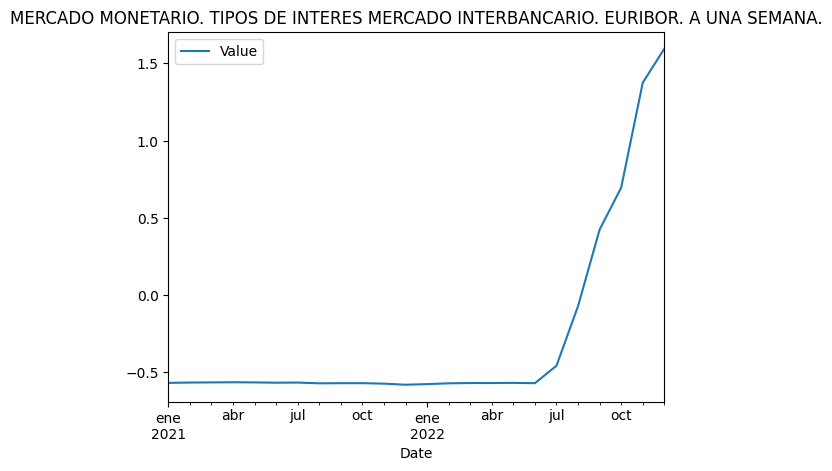

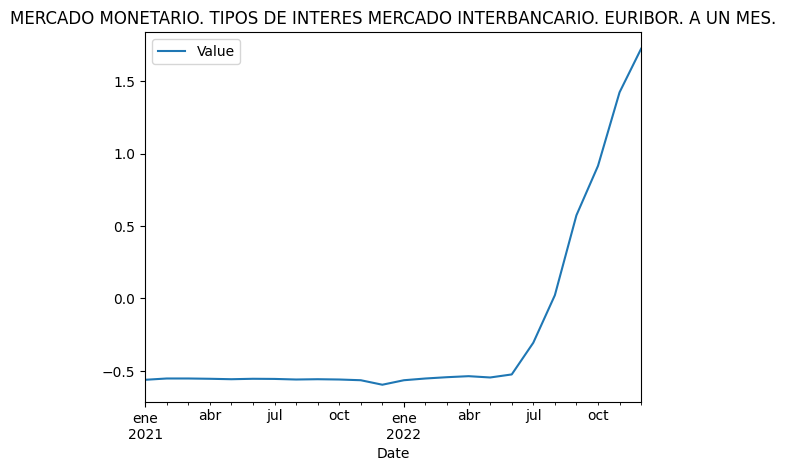

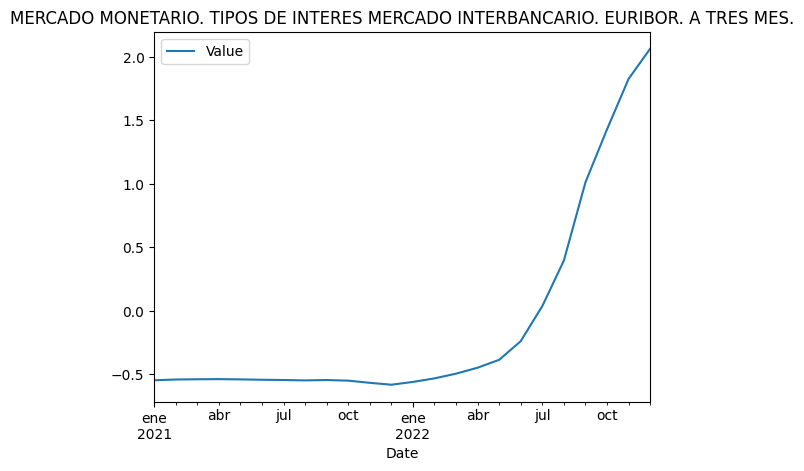

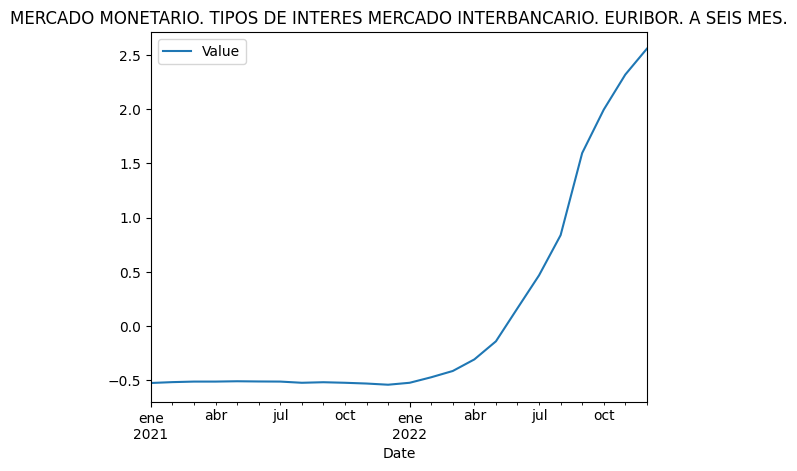

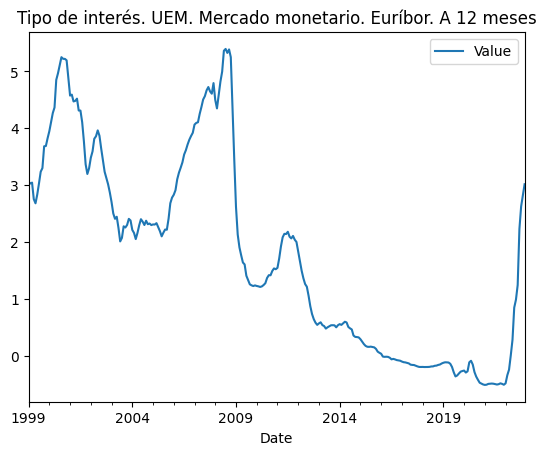

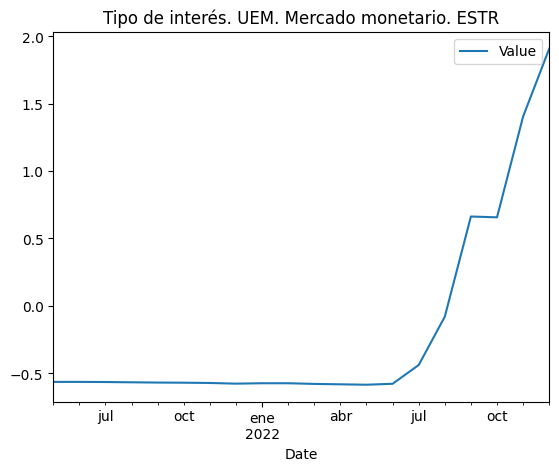

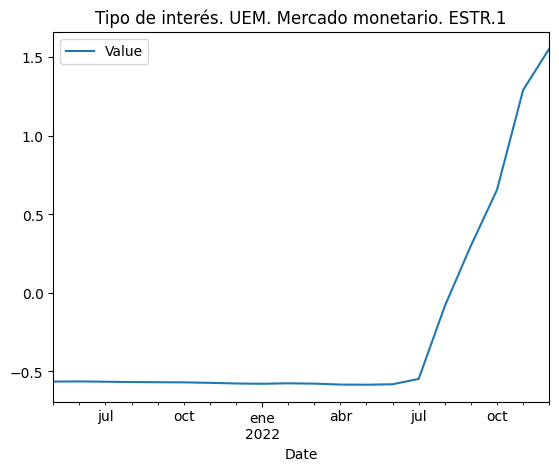

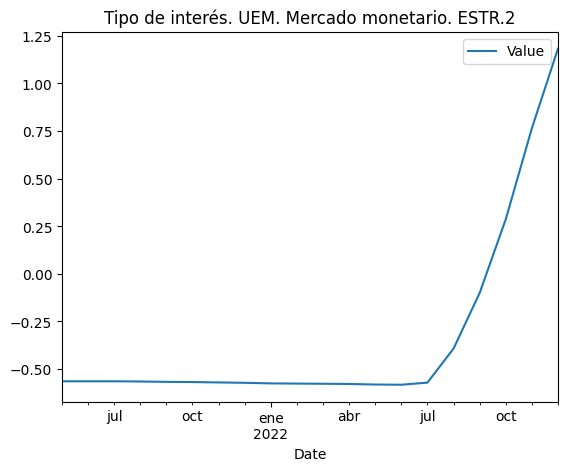

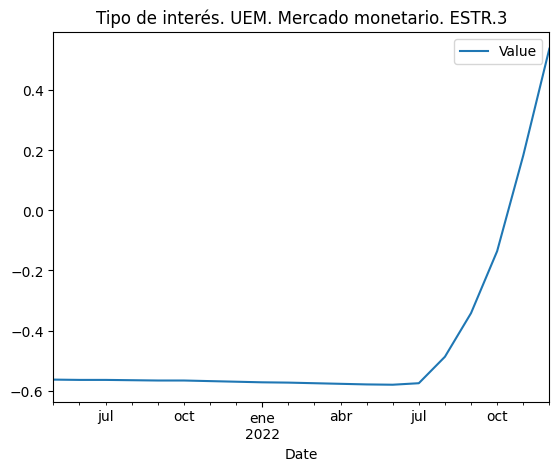

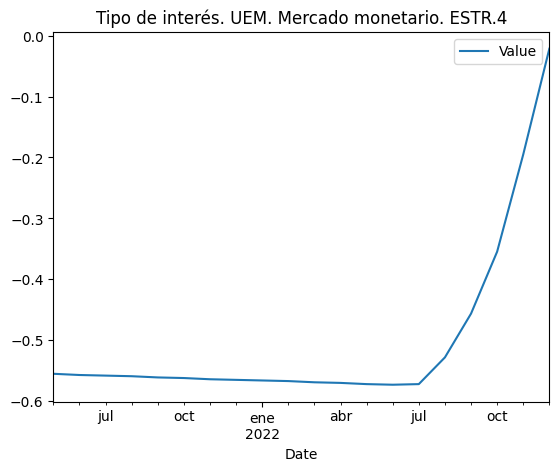

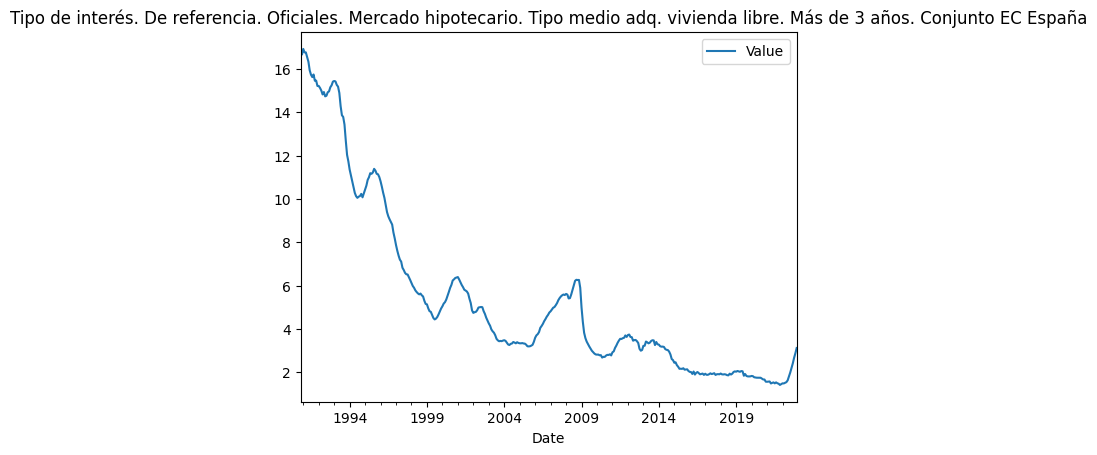

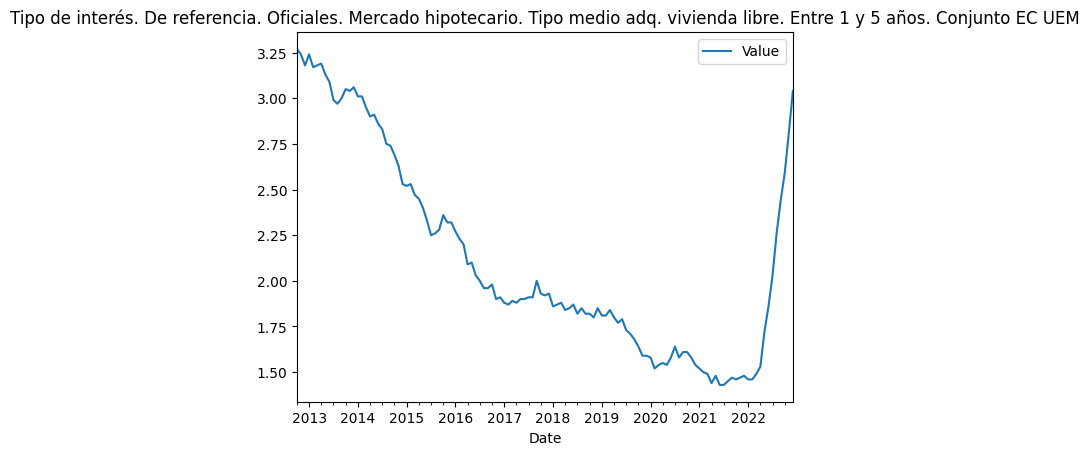

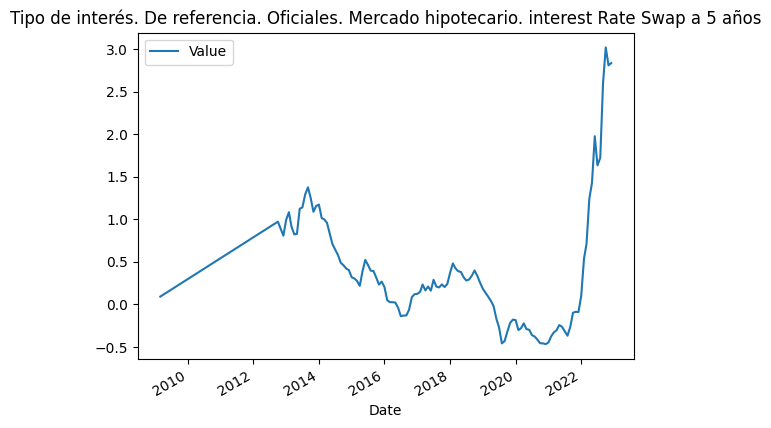

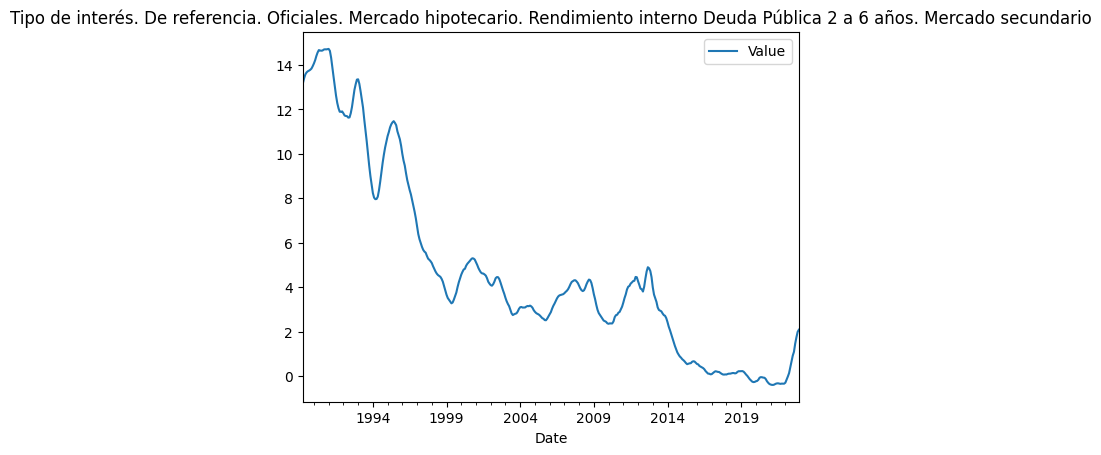

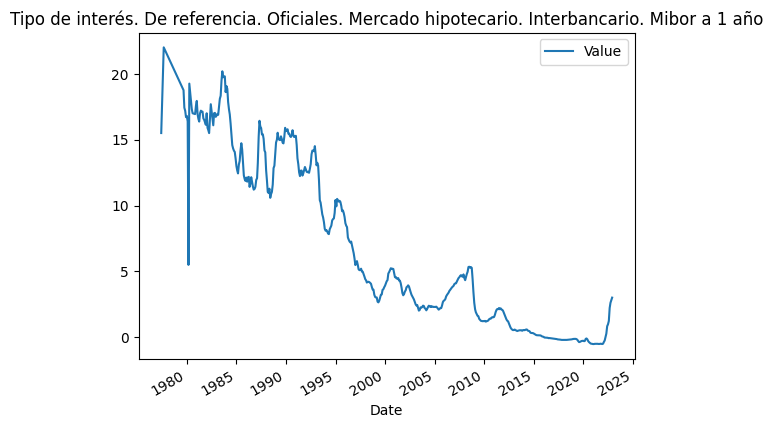

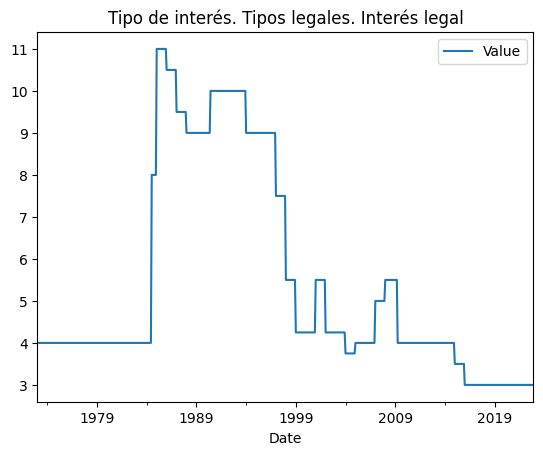

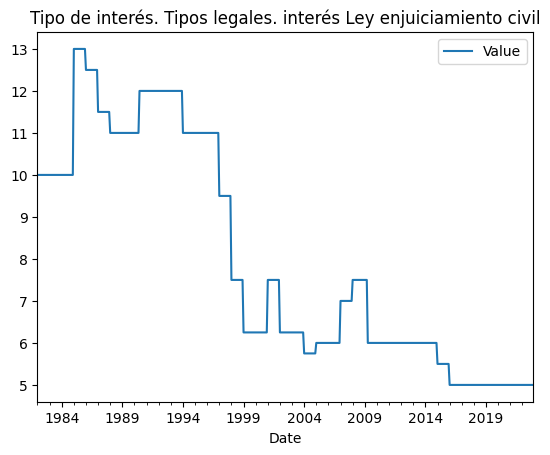

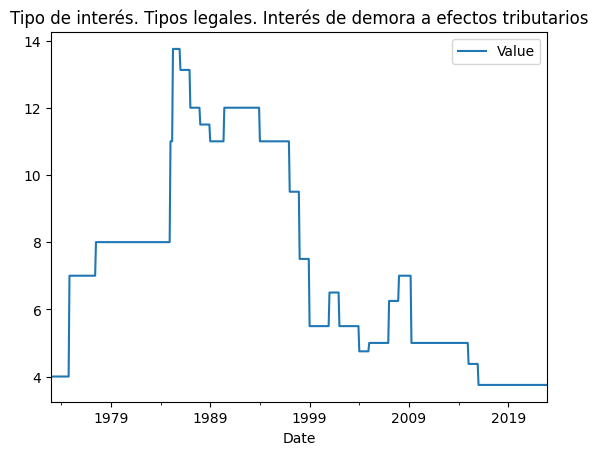

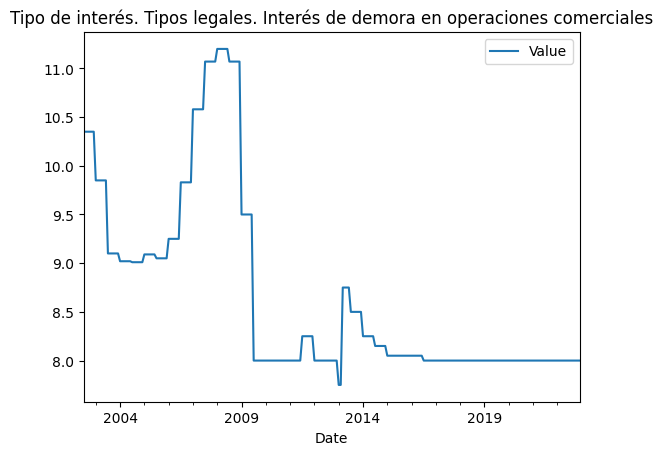

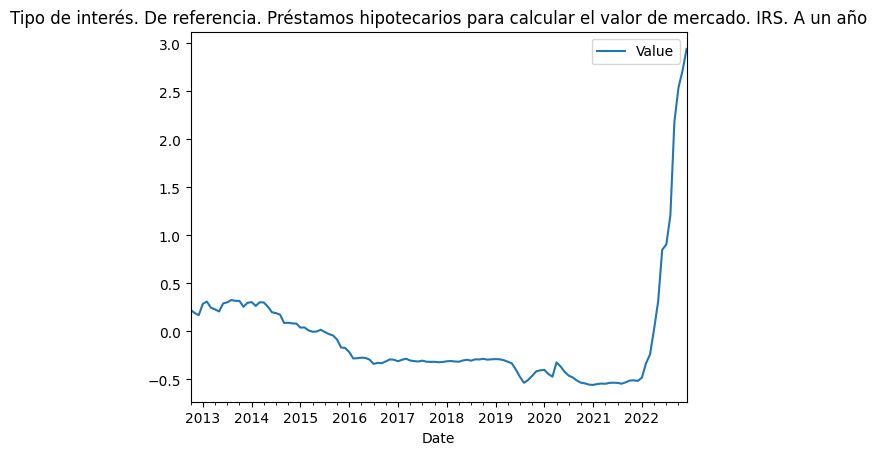

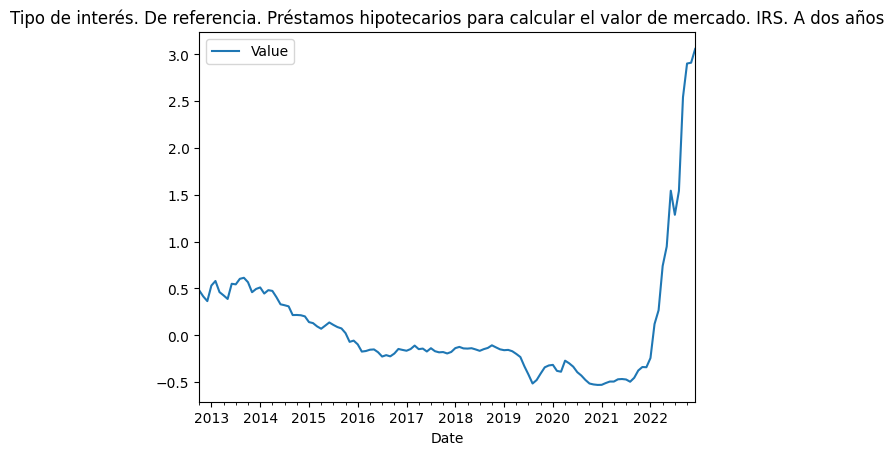

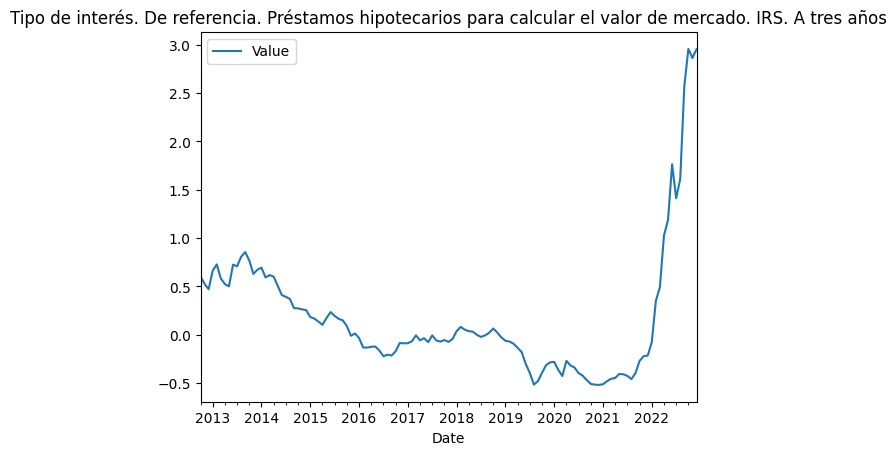

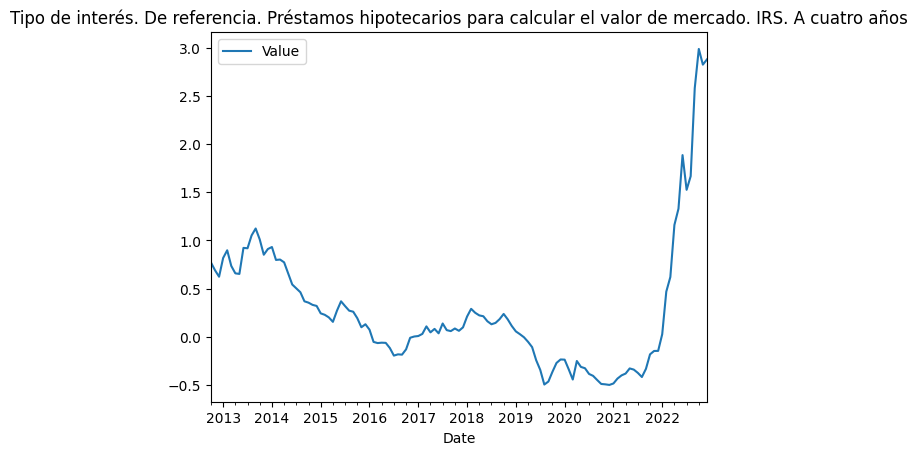

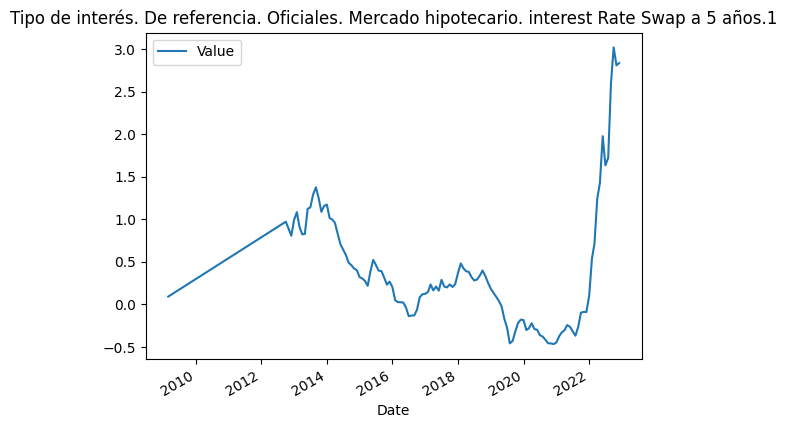

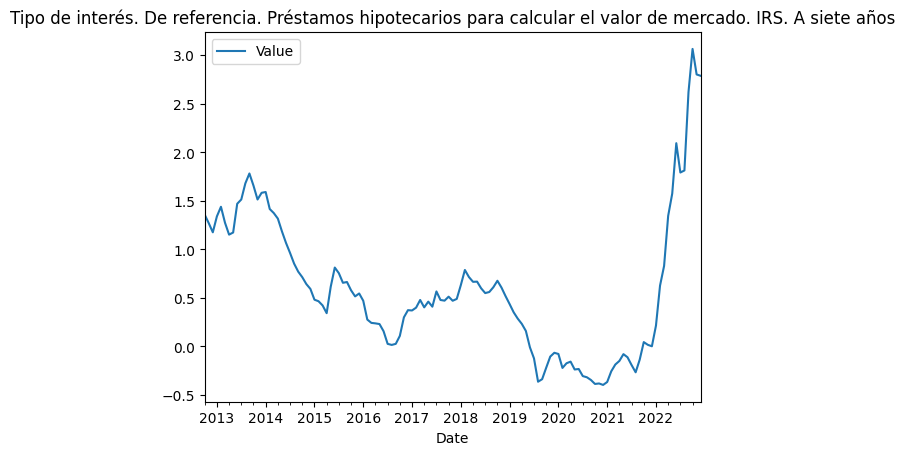

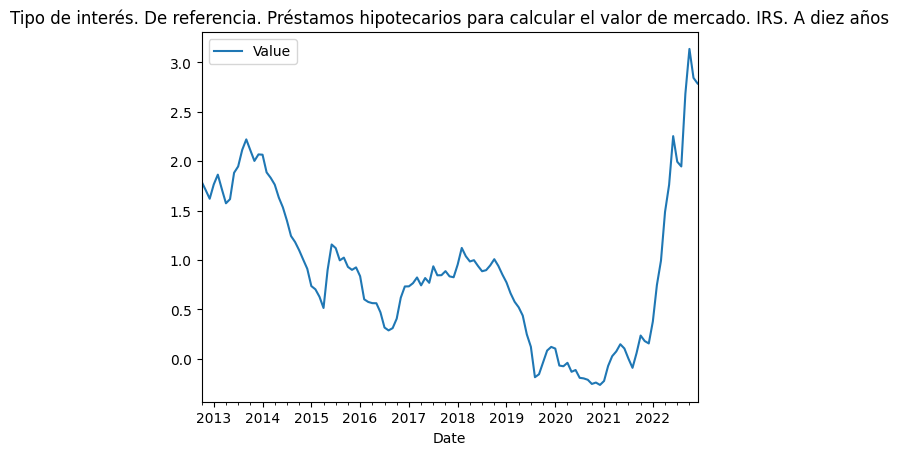

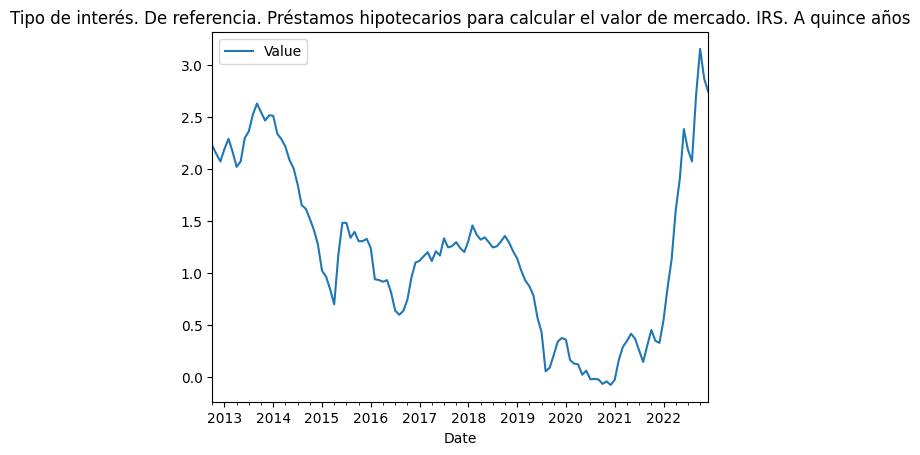

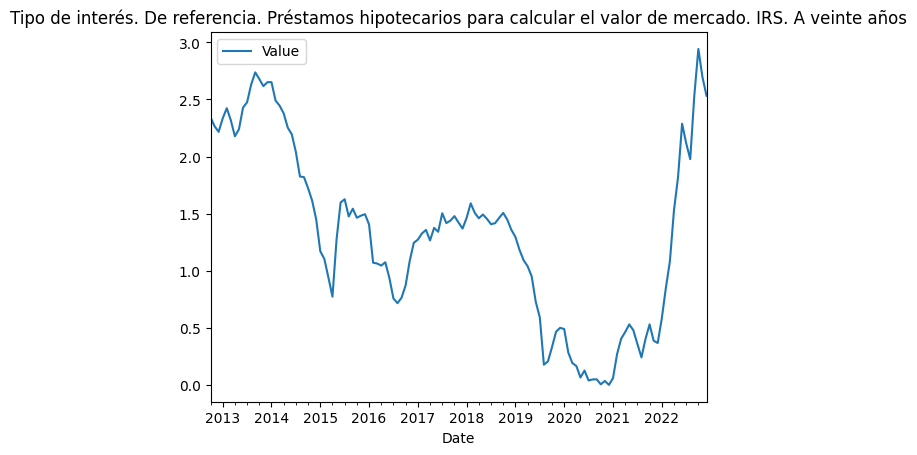

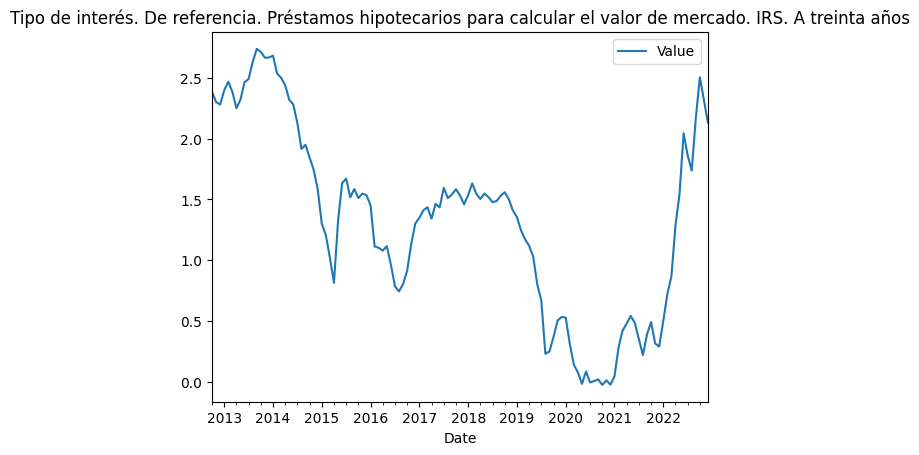

In [16]:
dt.dropna(inplace=True)
names = dt[dt['Ud'] == '%']['Name'].unique()

for name in names:
    print(name)
    dx = dt[dt['Name'] == name]
    dx.plot('Date','Value',title=name)